# 라이브러리 불러오기
# 1. 데이터 준비
# 2. 컬럼 살펴보기
## 2.1 type, duration
## 2.2 date_added, release_year
## 2.3 country, rating
## 2.4 listed_in
- 연도별 자주 나오는 배우/장르/감독
- 시간에 따라 국가별로 어떤 장르 인기 많아지는지
## 

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import seaborn as sns
sns.set_theme(style="darkgrid")

from sklearn.preprocessing import MultiLabelBinarizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 준비
data = pd.read_csv('./netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# 2. 컬럼 살펴보기
## 2.1 type

In [4]:
# 결측 데이터 확인
data.type.isna().sum()

0

In [5]:
data.groupby('type').size()

type
Movie      6131
TV Show    2676
dtype: int64

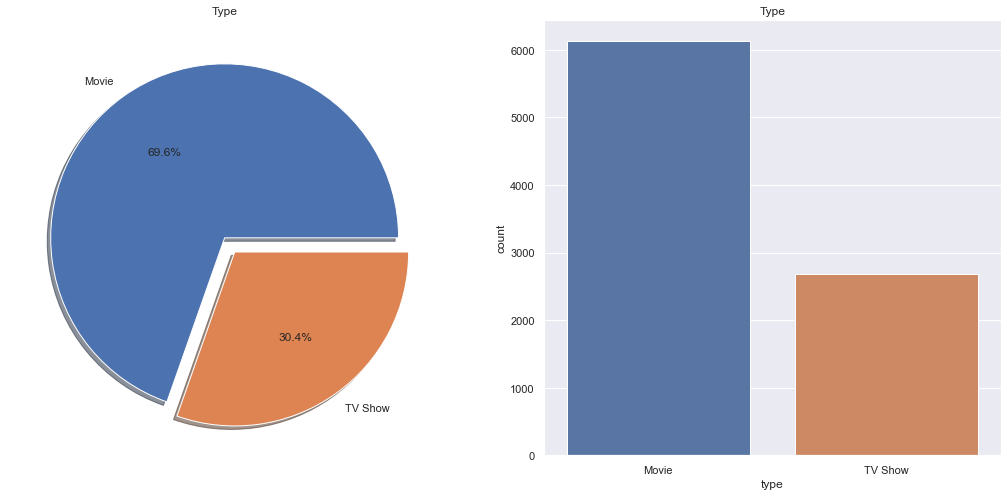

In [6]:
# 시각화
f, ax = plt.subplots(1, 2, figsize = (18,8))

data['type'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow=True)

ax[0].set_title('Type')
ax[0].set_ylabel('')

sns.countplot('type', data = data, ax = ax[1])
ax[1].set_title('Type')

plt.show()

## 2.2 duration

In [7]:
data['duration']

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

In [8]:
# duration dtype: object -> string 변환
data['duration'] = data['duration'].astype('string')
data['duration']

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: string

In [9]:
# duration에 있는 문자 제거, 숫자만 남김
# float 형 변환
data['duration'] = data['duration'].replace(to_replace='min', value='', regex=True)
data['duration'] = data['duration'].replace(to_replace='Seasons', value='', regex=True)
data['duration'] = data['duration'].replace(to_replace='Season', value='', regex=True)
data['duration'] = data['duration'].astype('float')
data['duration']

0        90.0
1         2.0
2         1.0
3         1.0
4         2.0
        ...  
8802    158.0
8803      2.0
8804     88.0
8805     88.0
8806    111.0
Name: duration, Length: 8807, dtype: float64

In [10]:
# 결측데이터 확인
data[data.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [11]:
# 컬럼 값 수정
data.duration.loc[5541]= 74
data.duration.loc[5794]= 84
data.duration.loc[5813]= 66
print(data.duration.loc[5541])
print(data.duration.loc[5794])
print(data.duration.loc[5813])

74.0
84.0
66.0


In [12]:
# 결측치 가진 데이터 행 확인하기
data.duration.isnull().sum()

0

In [13]:
# movie duration max 값 확인
data[data['type']=='Movie'].duration
#data[data['type']=='Movie'].duration.max()
print('movie duration max 값 확인', data[data['type']=='Movie'].duration.max())

# tv show max 값 확인
data[data['type']=='TV Show'].duration
#data[data['type']=='TV Show'].duration.max()
print('tv show max 값 확인', data[data['type']=='TV Show'].duration.max())

movie duration max 값 확인 312.0
tv show max 값 확인 17.0


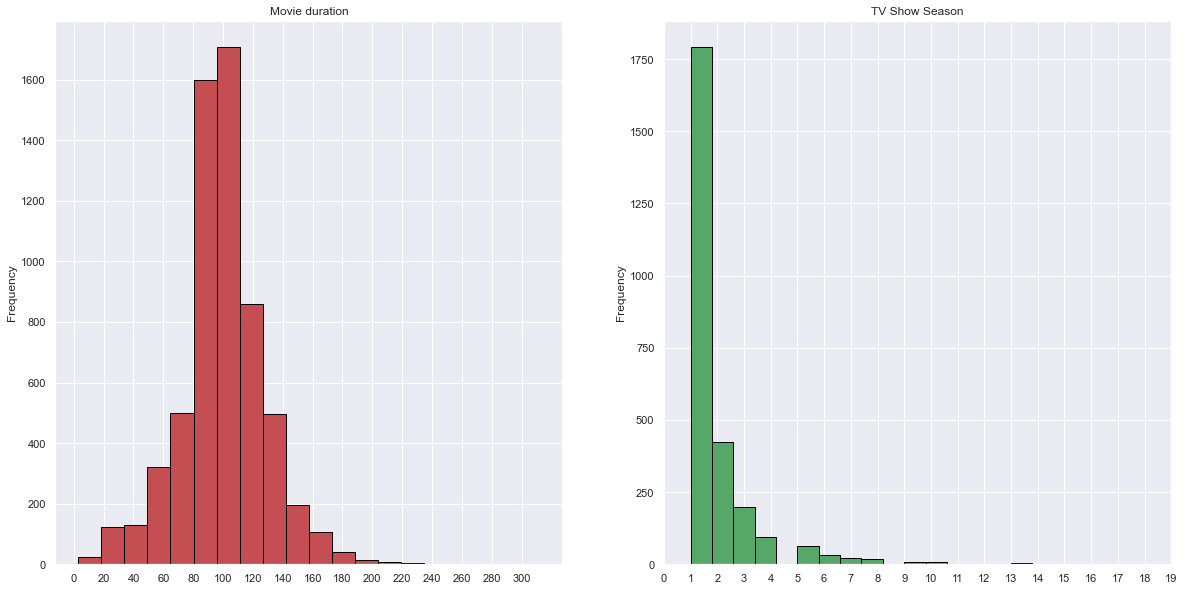

In [14]:
# 시각화
f, ax = plt.subplots(1, 2, figsize = (20,10))

x1 = list(range(0, 320, 20))

data[data['type']=='Movie'].duration.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='r')
ax[0].set_title('Movie duration')
ax[0].set_xticks(x1)

x2 = list(range(0, 20))

data[data['type']=='TV Show'].duration.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='g')
ax[1].set_title('TV Show Season')
ax[1].set_xticks(x2)

plt.show()

In [15]:
# 영화 최장시간 인덱스
data[data.duration.idxmax():data.duration.idxmax()+1]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312.0,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


In [16]:
# 가장 짧은 영화
a = data[data['type']=='Movie'].duration.idxmin()
data[a:a+1]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",NaN,United States,"June 4, 2019",2014,TV-Y,3.0,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ..."


In [17]:
# tv show 최다 시즌 인덱스
b = data[data['type']=='TV Show'].duration.idxmax()
data[b:b+1]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
548,s549,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"July 3, 2021",2020,TV-14,17.0,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...


## 2.3 date_added

In [18]:
# 결측치 확인
data['date_added'].isna().sum()

10

In [19]:
data['release_year'].value_counts().sort_index()

1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: release_year, Length: 74, dtype: int64

In [20]:
# 
netflix_date = data[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
netflix_date.head()

,date_added,year,month
0,"September 25, 2021",2021,September
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September


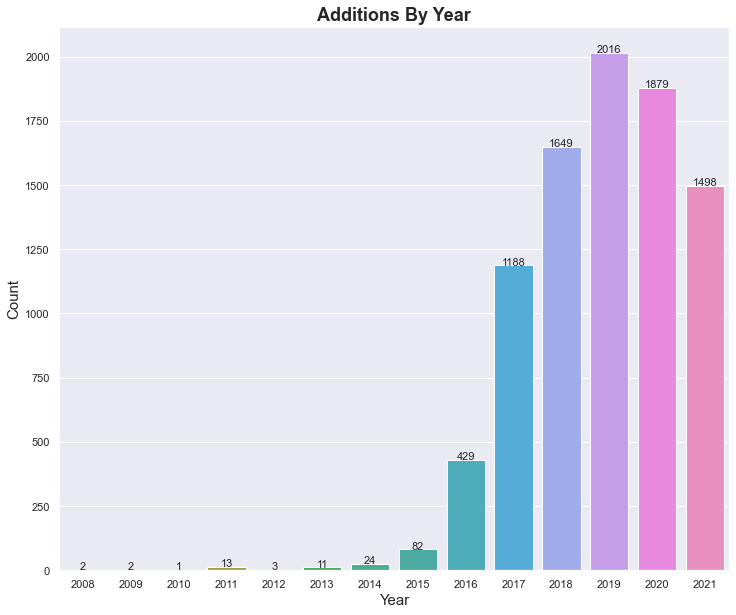

In [21]:
# 시각화
countplt, ax = plt.subplots(figsize=(12,10))
sns.set_theme(style="darkgrid")
year_order = map(str, range(2008,2022))
ax = sns.countplot(x='year', data=netflix_date, order=year_order)

ax.set_title('Additions By Year',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
#countplt
plt.show()

In [22]:
# 월별로 보기
netflix_date['month'].value_counts()

July         827
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: month, dtype: int64

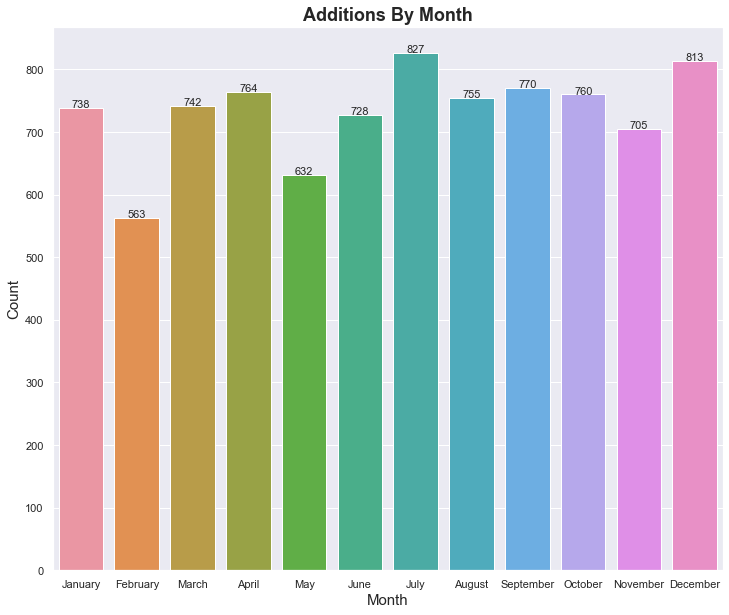

In [23]:
# 시각화
countplt, ax = plt.subplots(figsize=(12,10))
sns.set_theme(style="darkgrid")
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax = sns.countplot(x='month', data=netflix_date, order=month_order)

ax.set_title('Additions By Month',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Month', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
#countplt
plt.show()

In [24]:
data['added_year'] = netflix_date.year
data['added_year'].isna().sum()
#fake[fake['added_year'].isnull()]
data['added_month'] = netflix_date.month
data['added_month'].isna().sum()

10

## 2.4 release_year

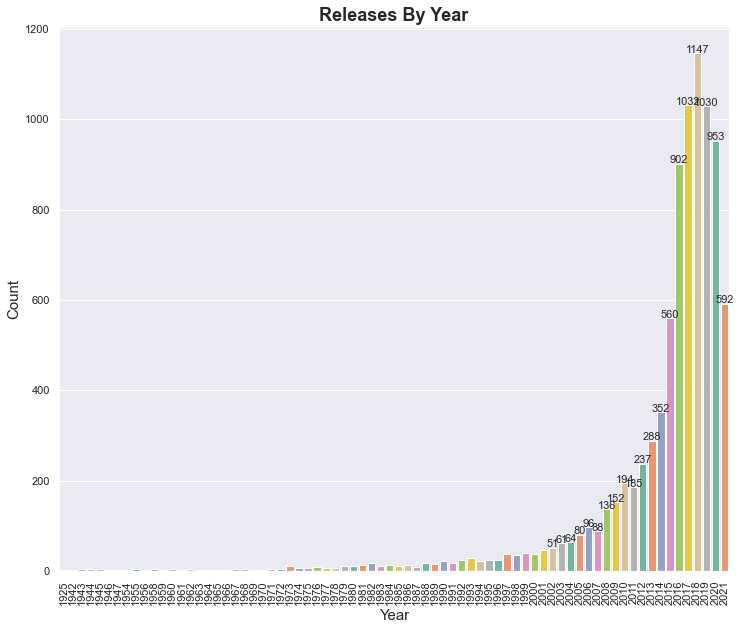

In [25]:
# 시각화
countplt, ax = plt.subplots(figsize=(12,10))
sns.set_theme(style="darkgrid")
#month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax = sns.countplot(x='release_year', data=data, palette='Set2')
plt.xticks(rotation='vertical')
ax.set_title('Releases By Year',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
for rect in ax.patches[-20:]:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

## 2.7 listed_in
### Genre One-Hot Encoding

In [26]:
# 장르 고유값 리스트로
original_genres = [x.split(', ') for x in data['listed_in']]
genres = np.unique(sum(original_genres, []))
genres

array(['Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies',
       'Classic & Cult TV', 'Classic Movies', 'Comedies',
       'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries',
       'Dramas', 'Faith & Spirituality', 'Horror Movies',
       'Independent Movies', 'International Movies',
       'International TV Shows', "Kids' TV", 'Korean TV Shows',
       'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV',
       'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy',
       'Science & Nature TV', 'Spanish-Language TV Shows',
       'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows',
       'TV Action & Adventure', 'TV Comedies', 'TV Dramas', 'TV Horror',
       'TV Mysteries', 'TV Sci-Fi & Fantasy', 'TV Shows', 'TV Thrillers',
       'Teen TV Shows', 'Thrillers'], dtype='<U28')

In [27]:
# 장르 개수
len(genres)

42

In [28]:
# listed_in 장르로 one-hot encoding
data['listed_in'] = [x.split(', ') for x in data['listed_in']]
genre_data = MultiLabelBinarizer(classes=genres).fit_transform(data['listed_in'].values)
df = pd.DataFrame(columns=genres, data=genre_data, index=data.index)
df.head()

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
# data에 one-hot encoding 추가
data = pd.concat([data, df], axis=1)
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90.0,...,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2.0,...,0,0,1,0,1,0,0,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1.0,...,1,0,0,0,0,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1.0,...,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2.0,...,0,1,0,0,0,0,0,0,0,0


In [30]:
# 영화 데이터와 드라마 데이터를 movie와 tv에 할당
movie = data[data['type']=='Movie']
tv = data[data['type']=='TV Show']
#movie.head()

In [31]:
#tv.head()

In [32]:
# 영화에 사용되는 장르 분포
movie_labels = movie.iloc[:,14:].sum()
movie_labels = movie_labels[movie_labels>0]
print(len(movie_labels))
movie_labels

20


Action & Adventure           859
Anime Features                71
Children & Family Movies     641
Classic Movies               116
Comedies                    1674
Cult Movies                   71
Documentaries                869
Dramas                      2427
Faith & Spirituality          65
Horror Movies                357
Independent Movies           756
International Movies        2752
LGBTQ Movies                 102
Movies                        57
Music & Musicals             375
Romantic Movies              616
Sci-Fi & Fantasy             243
Sports Movies                219
Stand-Up Comedy              343
Thrillers                    577
dtype: int64

In [33]:
# 드라마에 사용되는 장르 분포
tv_labels = tv.iloc[:,14:].sum()
tv_labels = tv_labels[tv_labels>0]
print(len(tv_labels))
tv_labels

22


Anime Series                     176
British TV Shows                 253
Classic & Cult TV                 28
Crime TV Shows                   470
Docuseries                       395
International TV Shows          1351
Kids' TV                         451
Korean TV Shows                  151
Reality TV                       255
Romantic TV Shows                370
Science & Nature TV               92
Spanish-Language TV Shows        174
Stand-Up Comedy & Talk Shows      56
TV Action & Adventure            168
TV Comedies                      581
TV Dramas                        763
TV Horror                         75
TV Mysteries                      98
TV Sci-Fi & Fantasy               84
TV Shows                          16
TV Thrillers                      57
Teen TV Shows                     69
dtype: int64

In [34]:
movie_genres=list(movie_labels.index)
movie_genres

['Action & Adventure',
 'Anime Features',
 'Children & Family Movies',
 'Classic Movies',
 'Comedies',
 'Cult Movies',
 'Documentaries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Romantic Movies',
 'Sci-Fi & Fantasy',
 'Sports Movies',
 'Stand-Up Comedy',
 'Thrillers']

In [35]:
tv_genres=list(tv_labels.index)
tv_genres

['Anime Series',
 'British TV Shows',
 'Classic & Cult TV',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'Reality TV',
 'Romantic TV Shows',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows']

In [36]:
# 영화 데이터 one-hot encoding
movie = data[data['type']=='Movie']
movie_genre_data = MultiLabelBinarizer(classes=movie_genres).fit_transform(movie['listed_in'].values)
df = pd.DataFrame(columns=movie_genres, data=movie_genre_data, index=movie.index)
df.head()

,Action & Adventure,Anime Features,Children & Family Movies,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [37]:
# 영화 데이터에 one-hot encoding 추가
movie = pd.concat([movie, df], axis=1)
#movie.head()
movie.shape

(6131, 76)

In [38]:
# 드라마 데이터 one-hot encoding
tv = data[data['type']=='TV Show']
tv_genre_data = MultiLabelBinarizer(classes=tv_genres).fit_transform(tv['listed_in'].values)
df = pd.DataFrame(columns=tv_genres, data=tv_genre_data, index=tv.index)
#df.head()

In [39]:
# 영화 데이터에 one-hot encoding 추가
tv = pd.concat([tv, df], axis=1)
#tv.head()
tv.shape

(2676, 78)

In [40]:
movie.shape
tv.shape
df.shape
data.shape

(8807, 56)

### 전체/영화/tv 데이터에서의 장르 순위

In [41]:
genr = data.iloc[:, 14:].sum()
genr = genr[genr > 0]
genr
genr_dict = genr.to_dict()
genr_dict

{'Action & Adventure': 859,
 'Anime Features': 71,
 'Anime Series': 176,
 'British TV Shows': 253,
 'Children & Family Movies': 641,
 'Classic & Cult TV': 28,
 'Classic Movies': 116,
 'Comedies': 1674,
 'Crime TV Shows': 470,
 'Cult Movies': 71,
 'Documentaries': 869,
 'Docuseries': 395,
 'Dramas': 2427,
 'Faith & Spirituality': 65,
 'Horror Movies': 357,
 'Independent Movies': 756,
 'International Movies': 2752,
 'International TV Shows': 1351,
 "Kids' TV": 451,
 'Korean TV Shows': 151,
 'LGBTQ Movies': 102,
 'Movies': 57,
 'Music & Musicals': 375,
 'Reality TV': 255,
 'Romantic Movies': 616,
 'Romantic TV Shows': 370,
 'Sci-Fi & Fantasy': 243,
 'Science & Nature TV': 92,
 'Spanish-Language TV Shows': 174,
 'Sports Movies': 219,
 'Stand-Up Comedy': 343,
 'Stand-Up Comedy & Talk Shows': 56,
 'TV Action & Adventure': 168,
 'TV Comedies': 581,
 'TV Dramas': 763,
 'TV Horror': 75,
 'TV Mysteries': 98,
 'TV Sci-Fi & Fantasy': 84,
 'TV Shows': 16,
 'TV Thrillers': 57,
 'Teen TV Shows': 69,


In [42]:
# 빈도수 상위 20개의 장르를 출력
sorted_genr_count = sorted(genr_dict, key = genr_dict.get, reverse=True)

for key in sorted_genr_count[:20]:  
    print(f'{repr(key)}:{genr_dict[key]}', end = ', ')

'International Movies':2752, 'Dramas':2427, 'Comedies':1674, 'International TV Shows':1351, 'Documentaries':869, 'Action & Adventure':859, 'TV Dramas':763, 'Independent Movies':756, 'Children & Family Movies':641, 'Romantic Movies':616, 'TV Comedies':581, 'Thrillers':577, 'Crime TV Shows':470, "Kids' TV":451, 'Docuseries':395, 'Music & Musicals':375, 'Romantic TV Shows':370, 'Horror Movies':357, 'Stand-Up Comedy':343, 'Reality TV':255, 

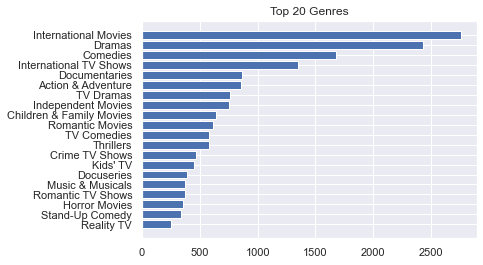

In [43]:
# 시각화
n = sorted_genr_count[:20][::-1]
w = [genr_dict[key] for key in n]
plt.barh(n, w)
plt.title('Top 20 Genres')
plt.show()

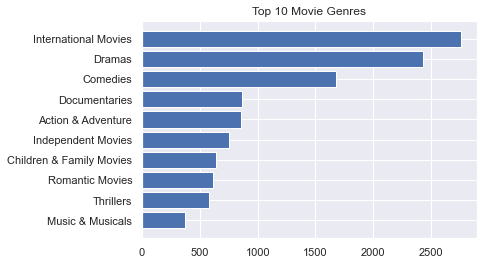

In [44]:
# 영화데이터 장르 순위
movie_genr_dict = movie_labels.to_dict()

sorted_movie_genr = sorted(movie_genr_dict, key = movie_genr_dict.get, reverse=True)

# 시각화
n = sorted_movie_genr[:10][::-1]
w = [movie_genr_dict[key] for key in n]
plt.barh(n, w)
plt.title('Top 10 Movie Genres')
plt.show()

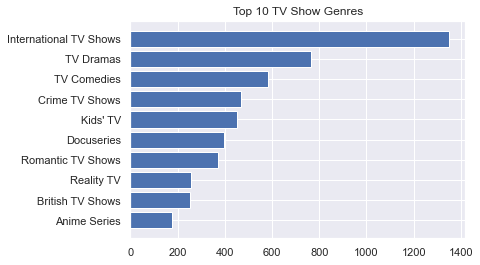

In [45]:
# tv show 장르 순위
tv_genr_dict = tv_labels.to_dict()

sorted_tv_genr = sorted(tv_genr_dict, key = tv_genr_dict.get, reverse=True)

# 시각화
n = sorted_tv_genr[:10][::-1]
w = [tv_genr_dict[key] for key in n]
plt.barh(n, w)
plt.title('Top 10 TV Show Genres')
plt.show()

### 연도 별 장르 순위: date_added / release_year

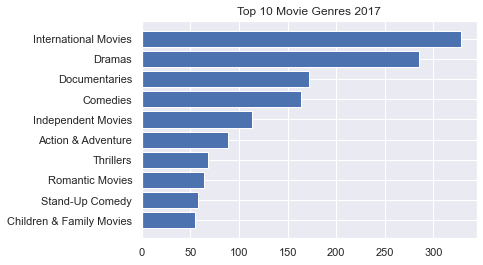

In [46]:
example = data[(data['release_year']==2017)&(data['type']=='Movie')].iloc[:, 14:].sum()
example = example[example > 0]
ex = example.to_dict()

sorted_2017_genr = sorted(ex, key = ex.get, reverse=True)

# 시각화
n = sorted_2017_genr[:10][::-1]
w = [ex[key] for key in n]
plt.barh(n, w)
plt.title('Top 10 Movie Genres 2017')
plt.show()

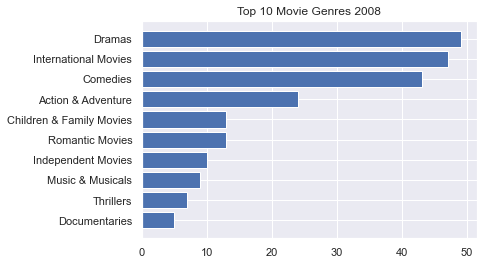

In [47]:
example2 = data[(data['release_year']==2008)&(data['type']=='Movie')].iloc[:, 14:].sum()
example2 = example2[example2 > 0]
ex2 = example2.to_dict()

sorted_2008_genr = sorted(ex2, key = ex2.get, reverse=True)

# 시각화
n = sorted_2008_genr[:10][::-1]
w = [ex2[key] for key in n]
plt.barh(n, w)
plt.title('Top 10 Movie Genres 2008')
plt.show()

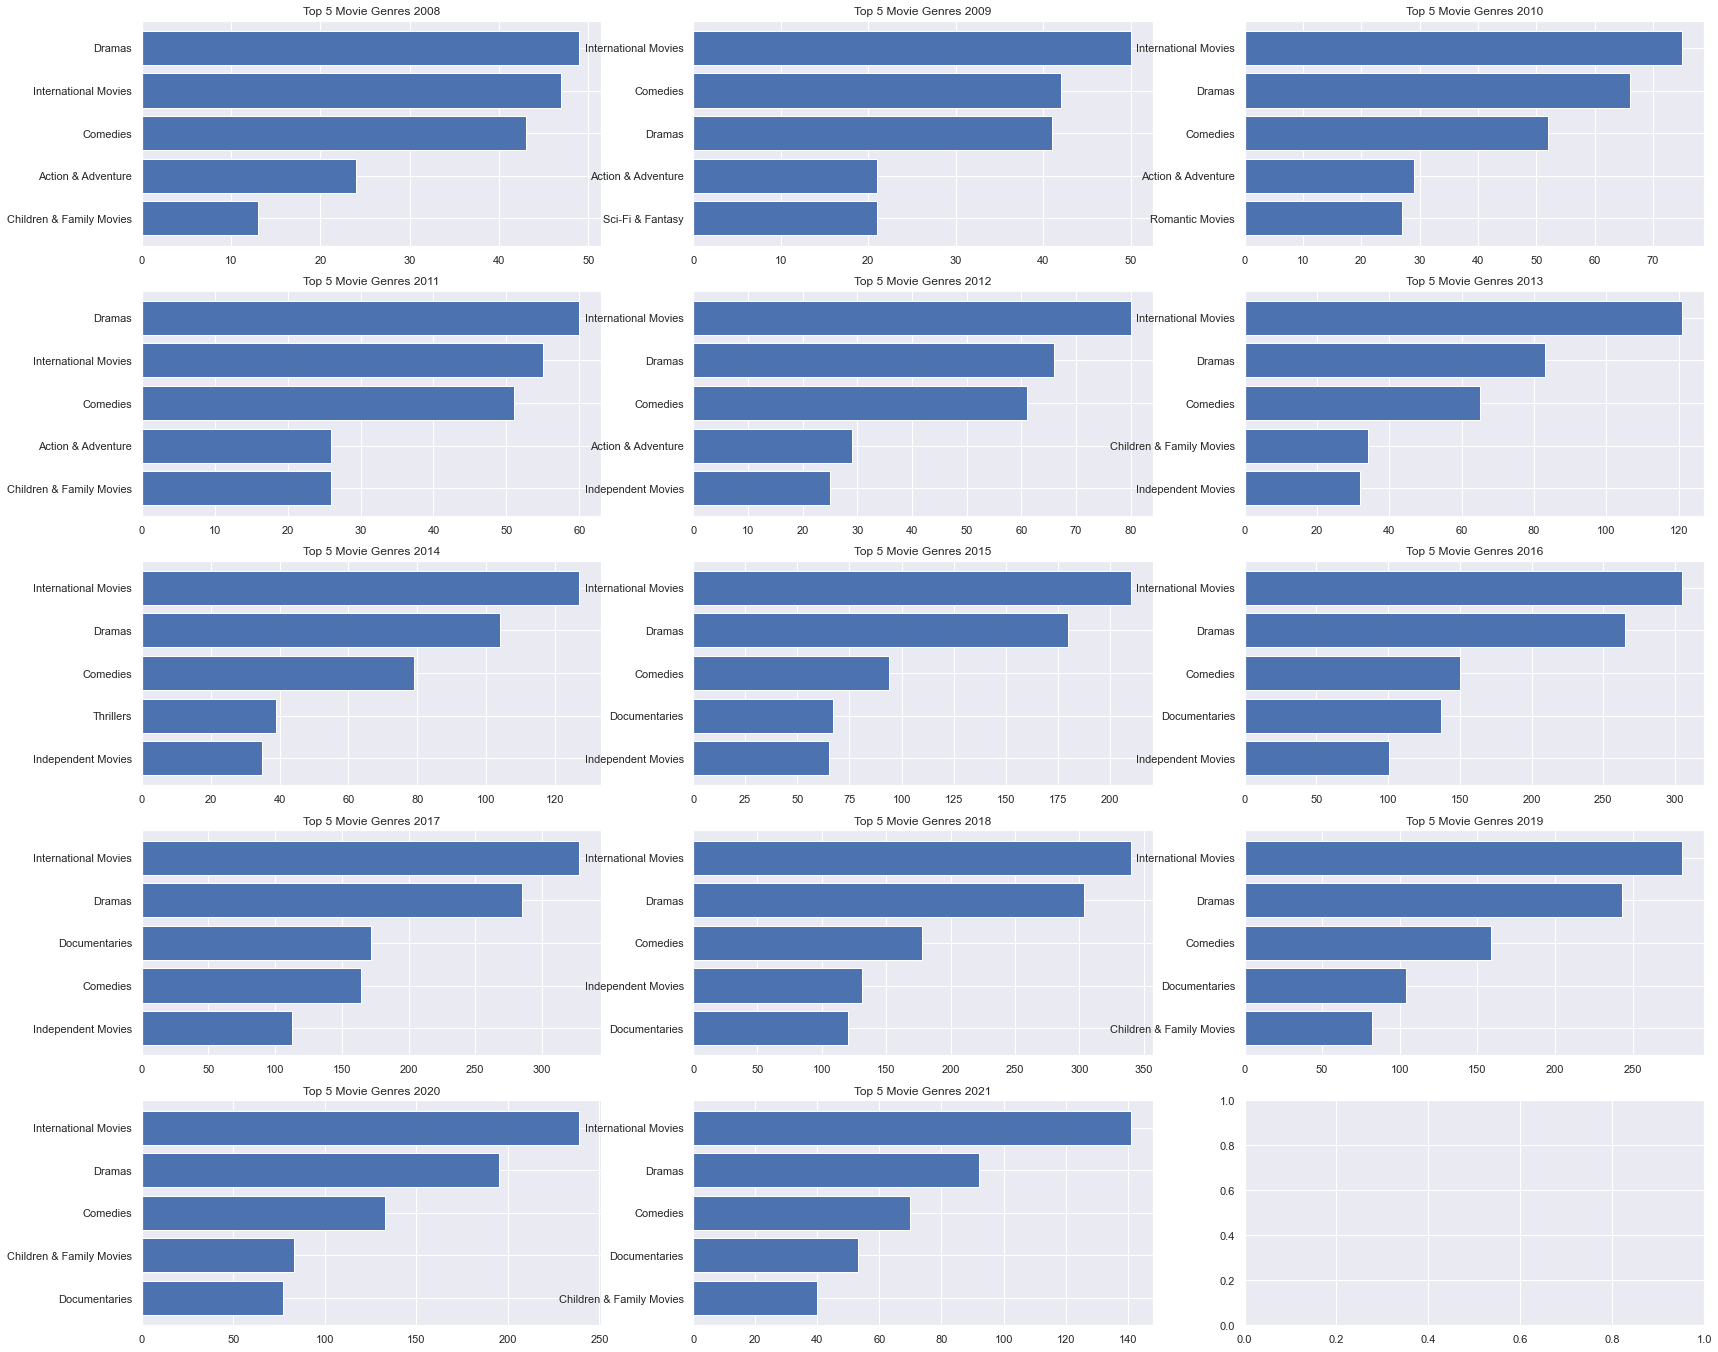

In [48]:
# release_year 기준 : Movies
i = 0
fig, ax = plt.subplots(5, 3, figsize=(28, 24))

for year in range(2008, 2022):
    example = data[(data['release_year']==year)&(data['type']=='Movie')].iloc[:, 14:].sum()
    example = example[example > 0]
    ex = example.to_dict()
    
    sorted_year_genr = sorted(ex, key = ex.get, reverse=True)
    
    n = sorted_year_genr[:5][::-1]
    w = [ex[key] for key in n] 
    
    i += 1
    plt.subplot(5, 3, i)
    plt.barh(n, w)
    plt.title('Top 5 Movie Genres {}'.format(year))
    
plt.show()

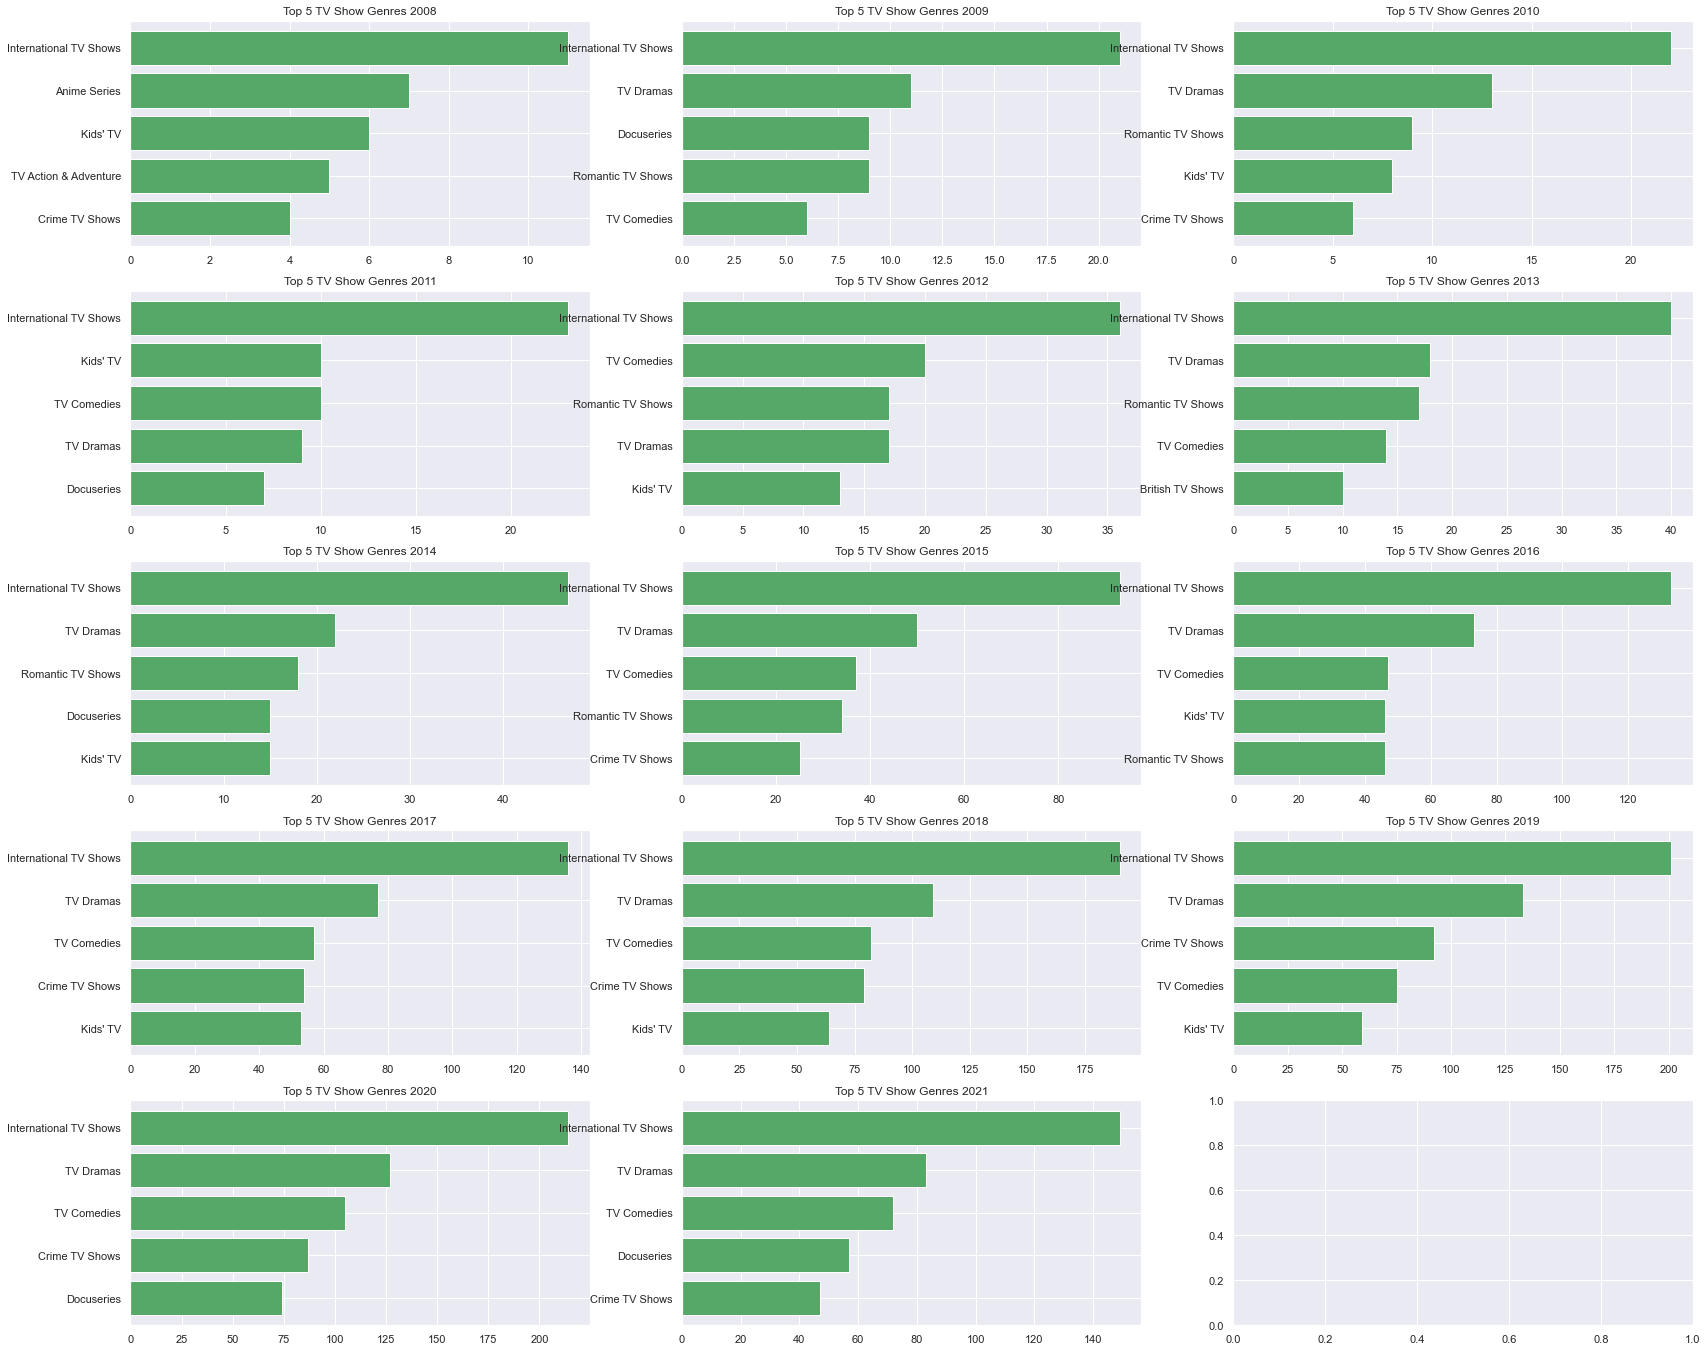

In [49]:
# release_year 기준 : tv show
i = 0
fig, ax = plt.subplots(5, 3, figsize=(28, 24))

for year in range(2008, 2022):
    example = data[(data['release_year']==year)&(data['type']=='TV Show')].iloc[:, 14:].sum()
    example = example[example > 0]
    ex = example.to_dict()
    
    sorted_year_genr = sorted(ex, key = ex.get, reverse=True)
    
    n = sorted_year_genr[:5][::-1]
    w = [ex[key] for key in n] 
    
    i += 1
    plt.subplot(5, 3, i)
    plt.barh(n, w, color='g')
    plt.title('Top 5 TV Show Genres {}'.format(year))
    
plt.show()

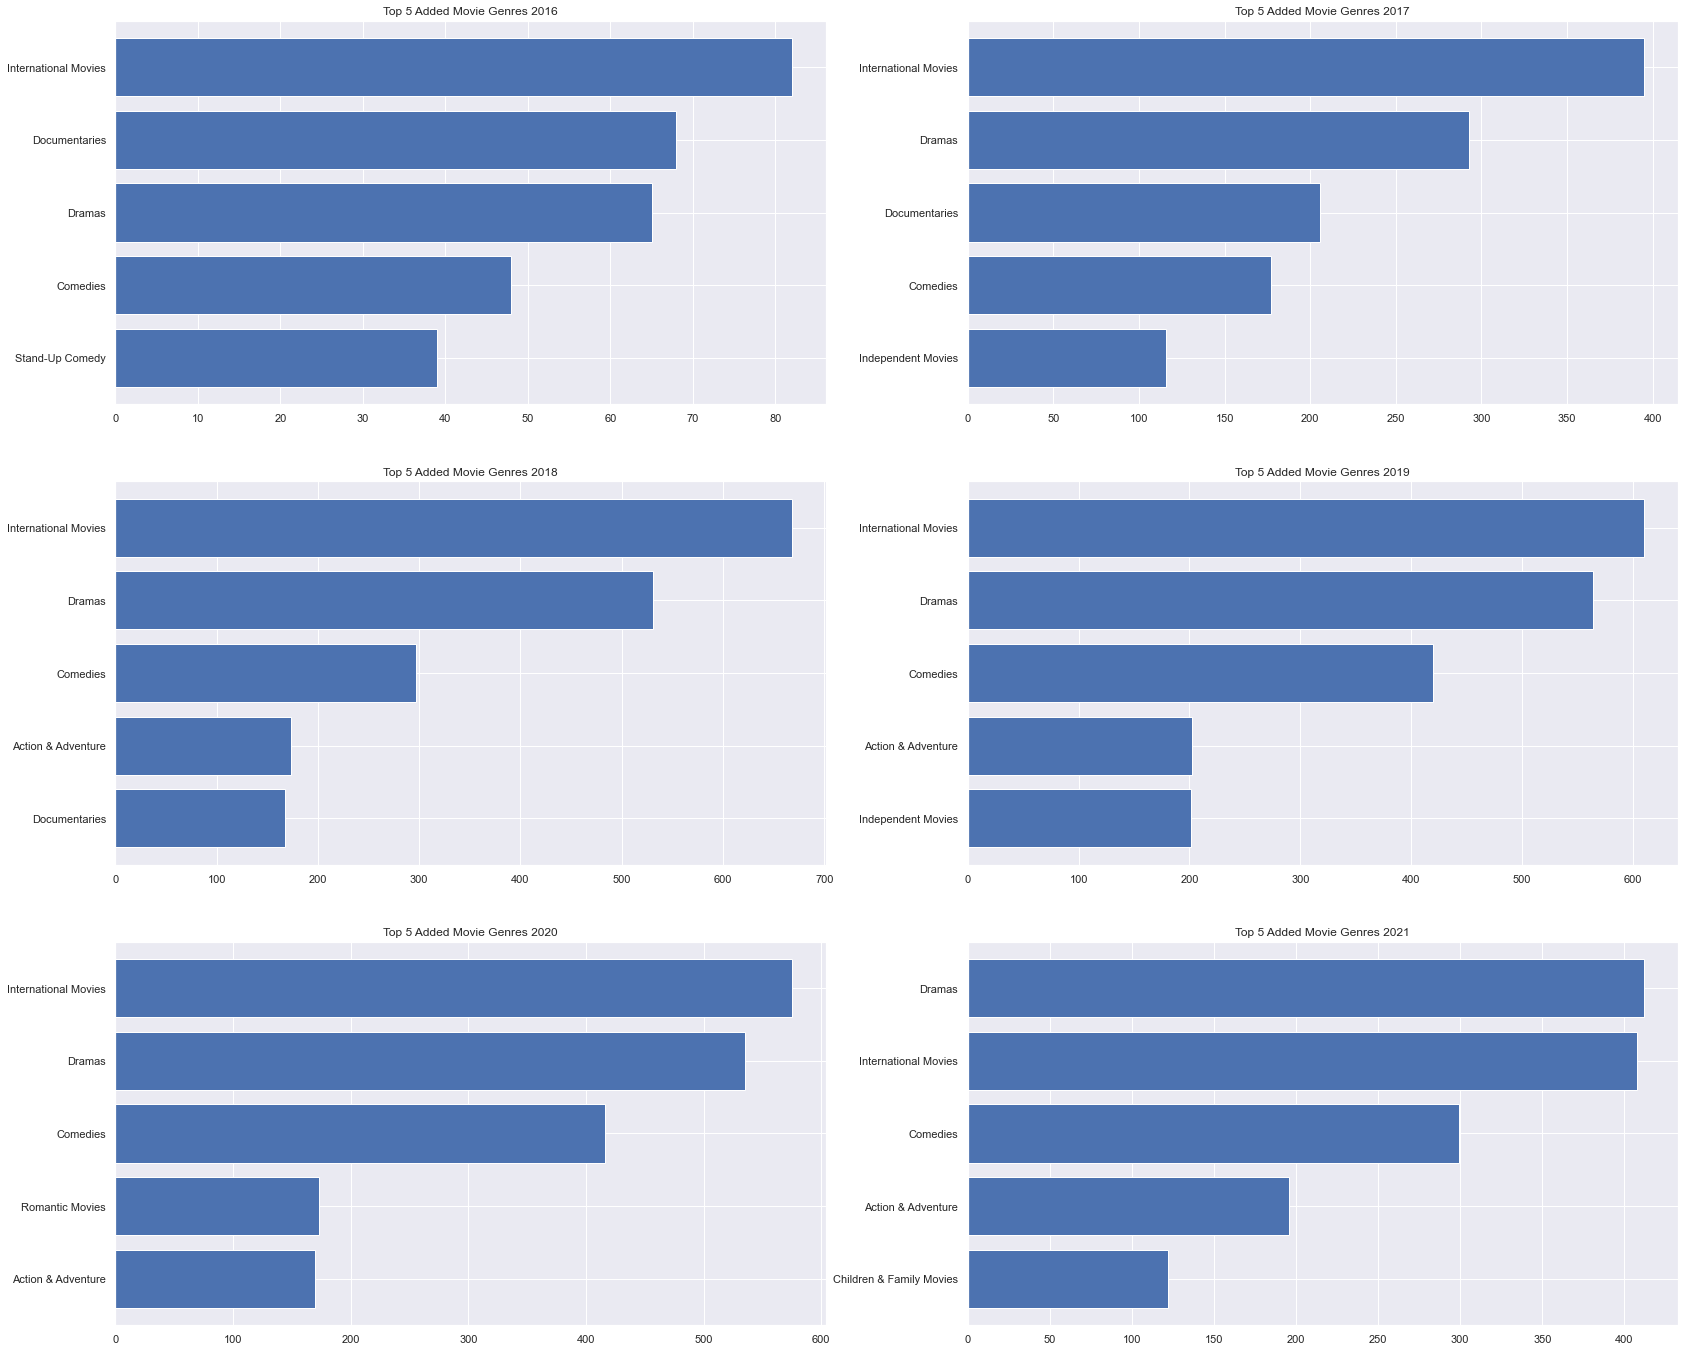

In [50]:
# added_year 기준 : Movies
i = 0
fig, ax = plt.subplots(3, 2, figsize=(28, 24))

for year in ['2016','2017','2018','2019','2020','2021']:
    example = data[(data['added_year']==year)&(data['type']=='Movie')].iloc[:, 14:].sum()
    example = example[example > 0]
    ex = example.to_dict()
    
    sorted_year_genr = sorted(ex, key = ex.get, reverse=True)
    
    n = sorted_year_genr[:5][::-1]
    w = [ex[key] for key in n] 
    
    i += 1
    plt.subplot(3, 2, i)
    plt.barh(n, w)
    plt.title('Top 5 Added Movie Genres {}'.format(year))
    
plt.show()

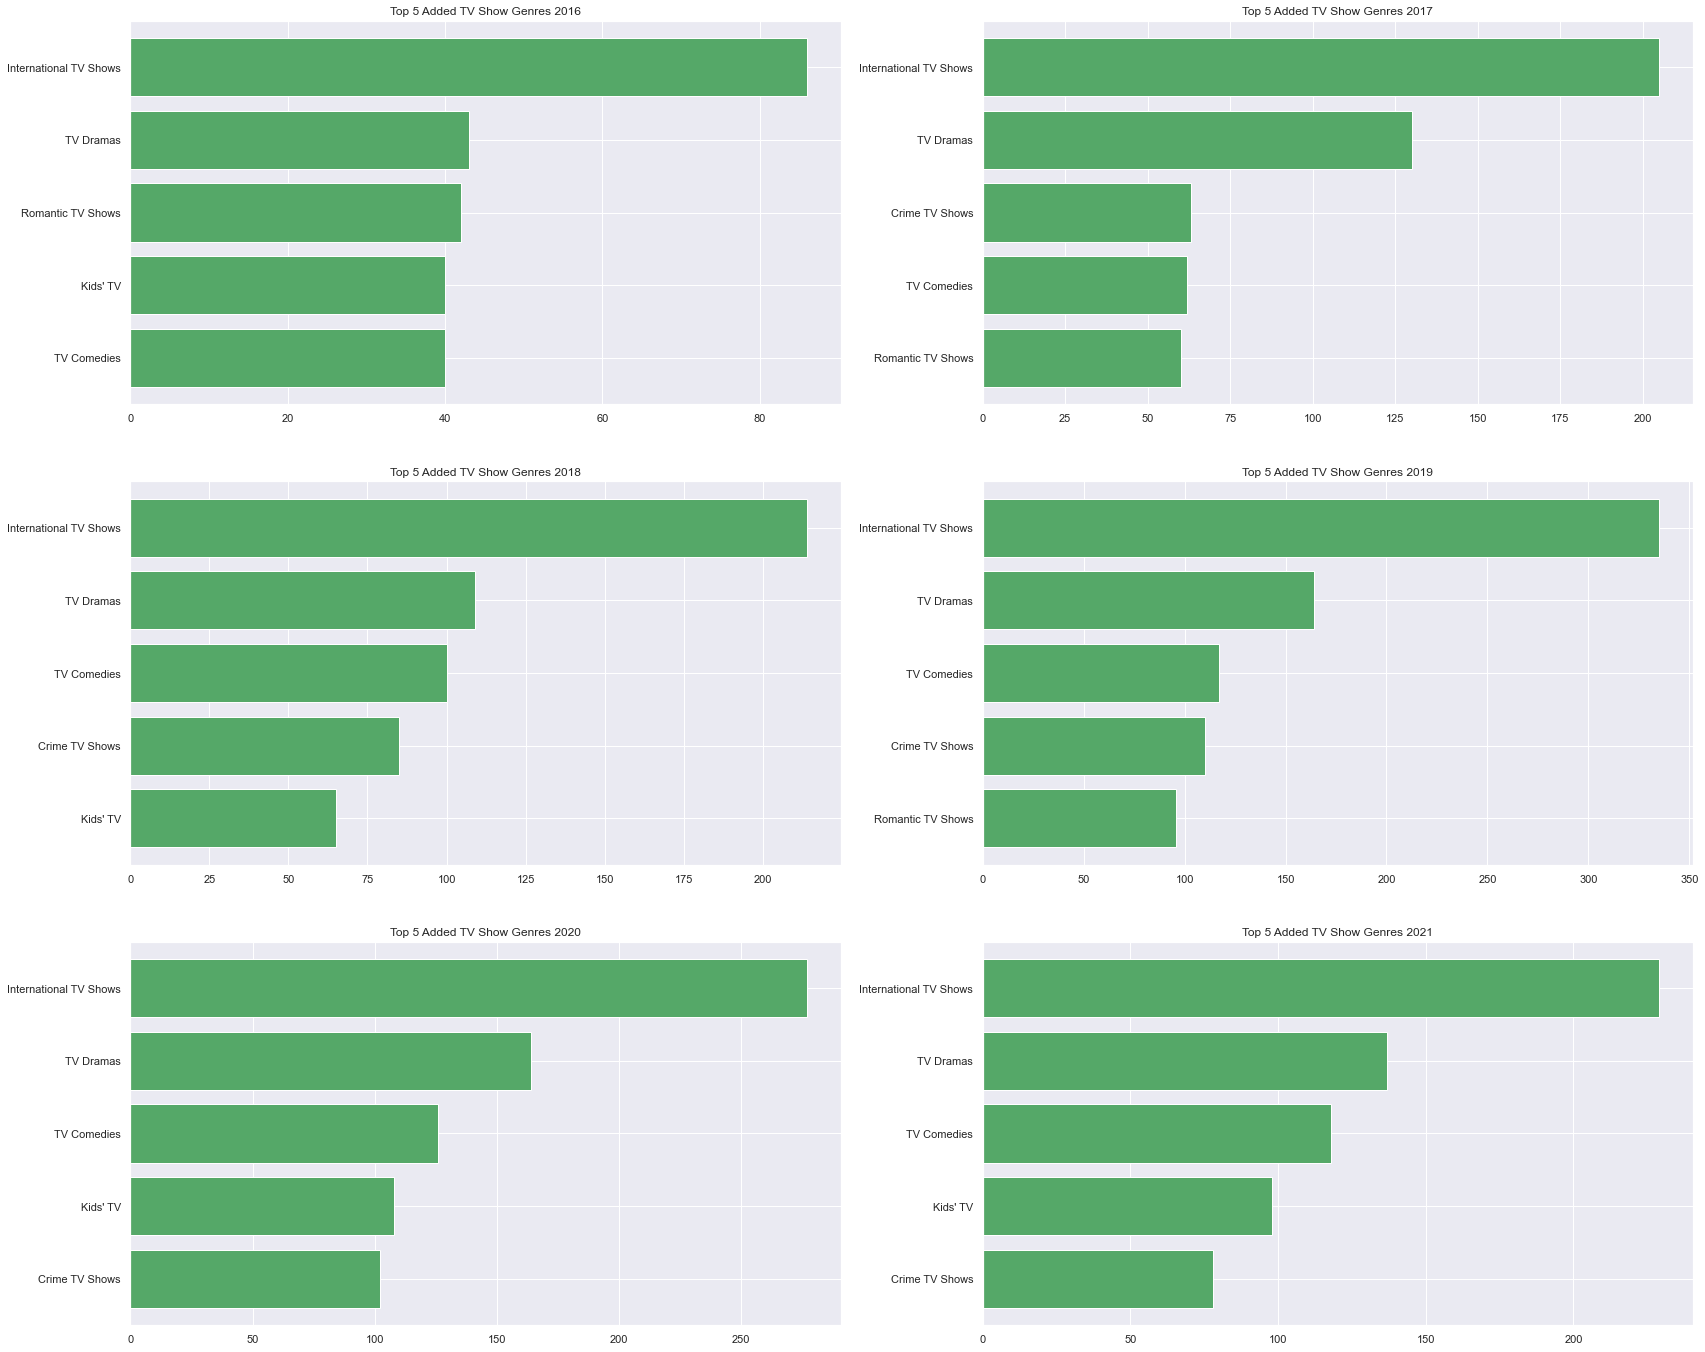

In [51]:
# added_year 기준 : TV Show
i = 0
fig, ax = plt.subplots(3, 2, figsize=(28, 24))

for year in ['2016','2017','2018','2019','2020','2021']:
    example = data[(data['added_year']==year)&(data['type']=='TV Show')].iloc[:, 14:].sum()
    example = example[example > 0]
    ex = example.to_dict()
    
    sorted_year_genr = sorted(ex, key = ex.get, reverse=True)
    
    n = sorted_year_genr[:5][::-1]
    w = [ex[key] for key in n] 
    
    i += 1
    plt.subplot(3, 2, i)
    plt.barh(n, w, color='g')
    plt.title('Top 5 Added TV Show Genres {}'.format(year))
    
plt.show()

#### 좀 보기 힘들지 않나..?
international 항목을 빼야하나
***
#### 꺾은선 그래프는 원하는 모양 안나옴 

In [52]:
#movie_labels_10 = movie_labels.sort_values(ascending=False)[:10]
#movie_labels_10
#plt.plot(movie_labels_10)

In [53]:
#plt.plot(data.groupby('release_year').Dramas.sum())
#plt.plot(data.groupby('release_year').Comedies.sum(), color='r')
#plt.plot(data.groupby('release_year').Documentaries.sum(), color='g')

### 월 별 장르 순위 added_month

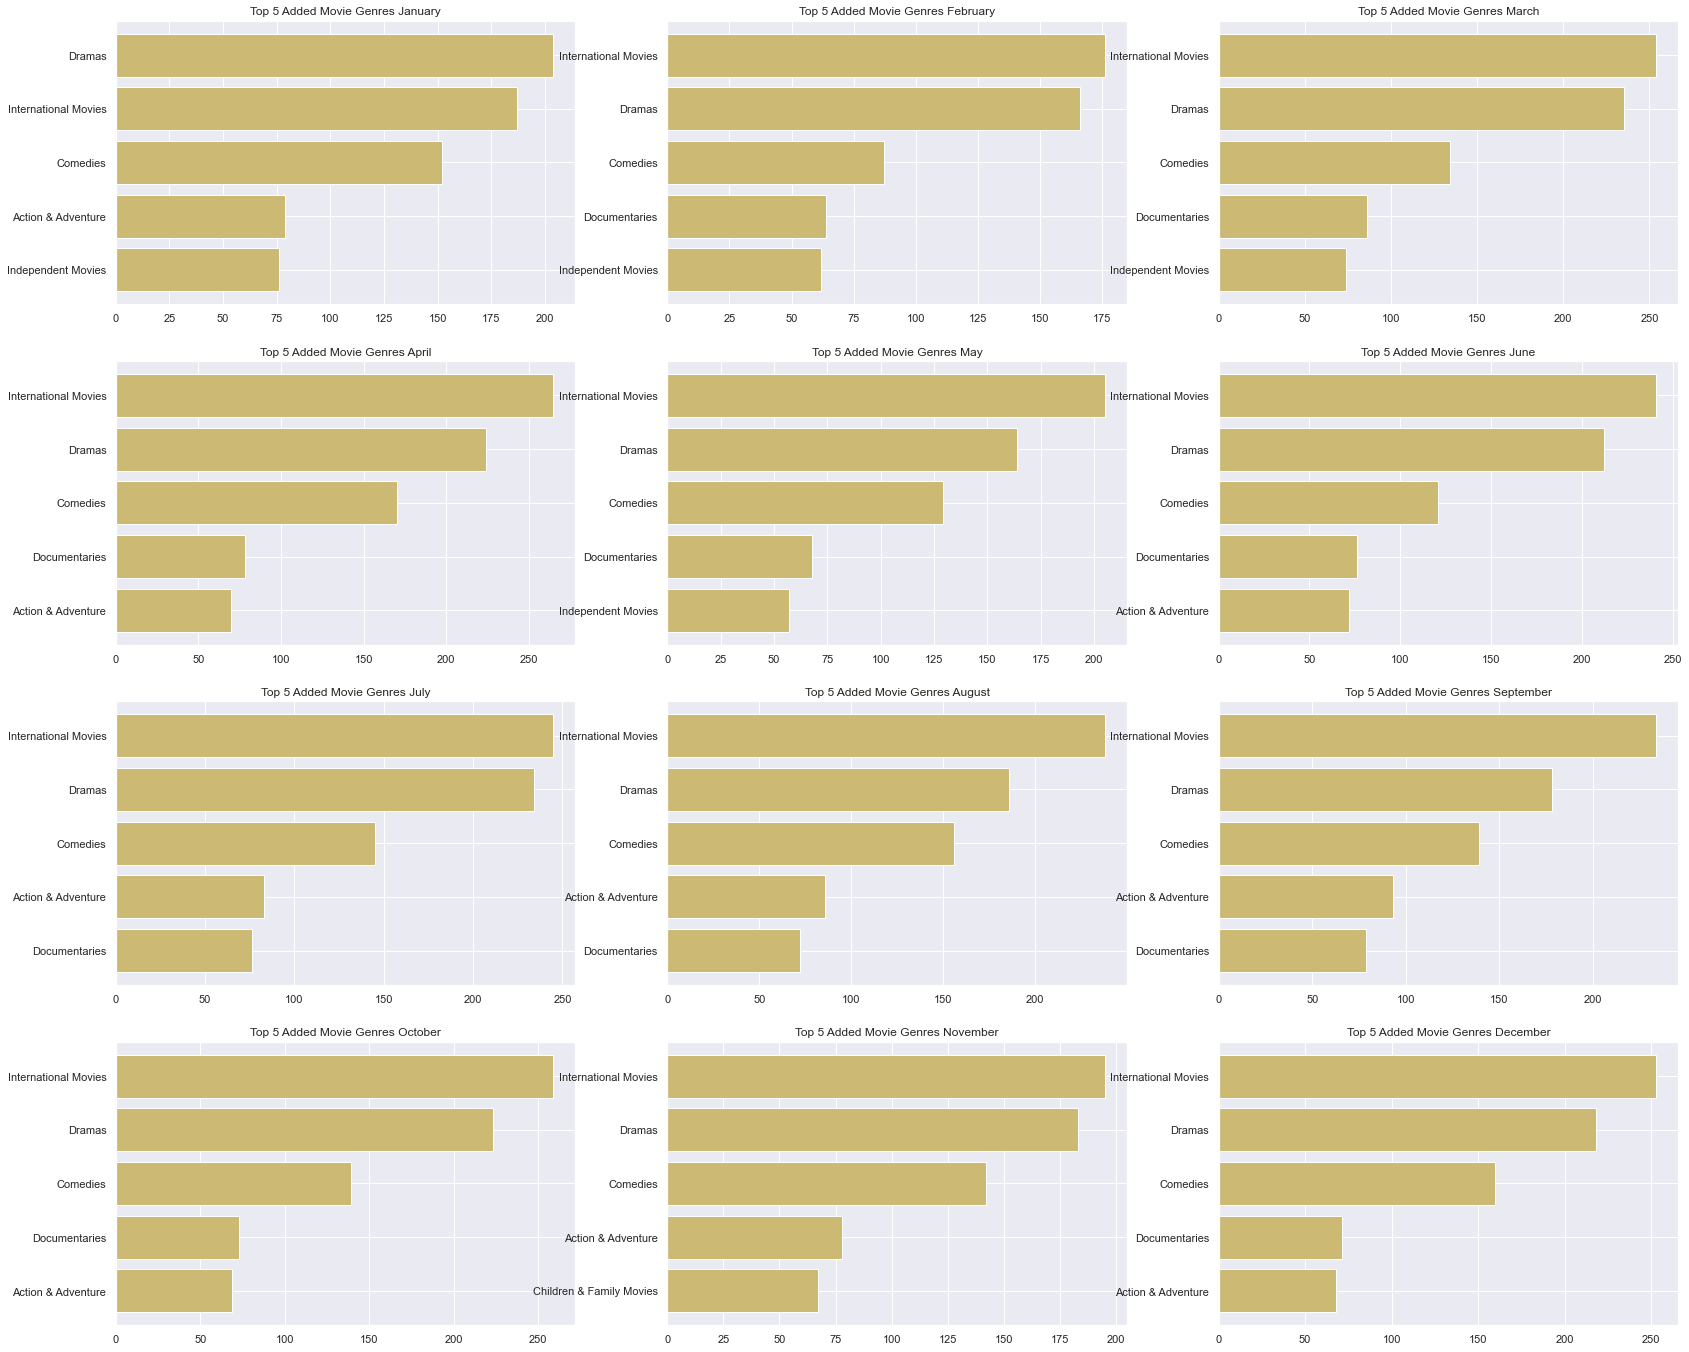

In [57]:
# added_month 기준 : Movies
i = 0
fig, ax = plt.subplots(4, 3, figsize=(28, 24))

for month in month_order:
    example = data[(data['added_month']==month)&(data['type']=='Movie')].iloc[:, 14:].sum()
    example = example[example > 0]
    ex = example.to_dict()
    
    sorted_month_genr = sorted(ex, key = ex.get, reverse=True)
    
    n = sorted_month_genr[:5][::-1]
    w = [ex[key] for key in n] 
    
    i += 1
    plt.subplot(4, 3, i)
    plt.barh(n, w, color='y')
    plt.title('Top 5 Added Movie Genres {}'.format(month))
    
plt.show()

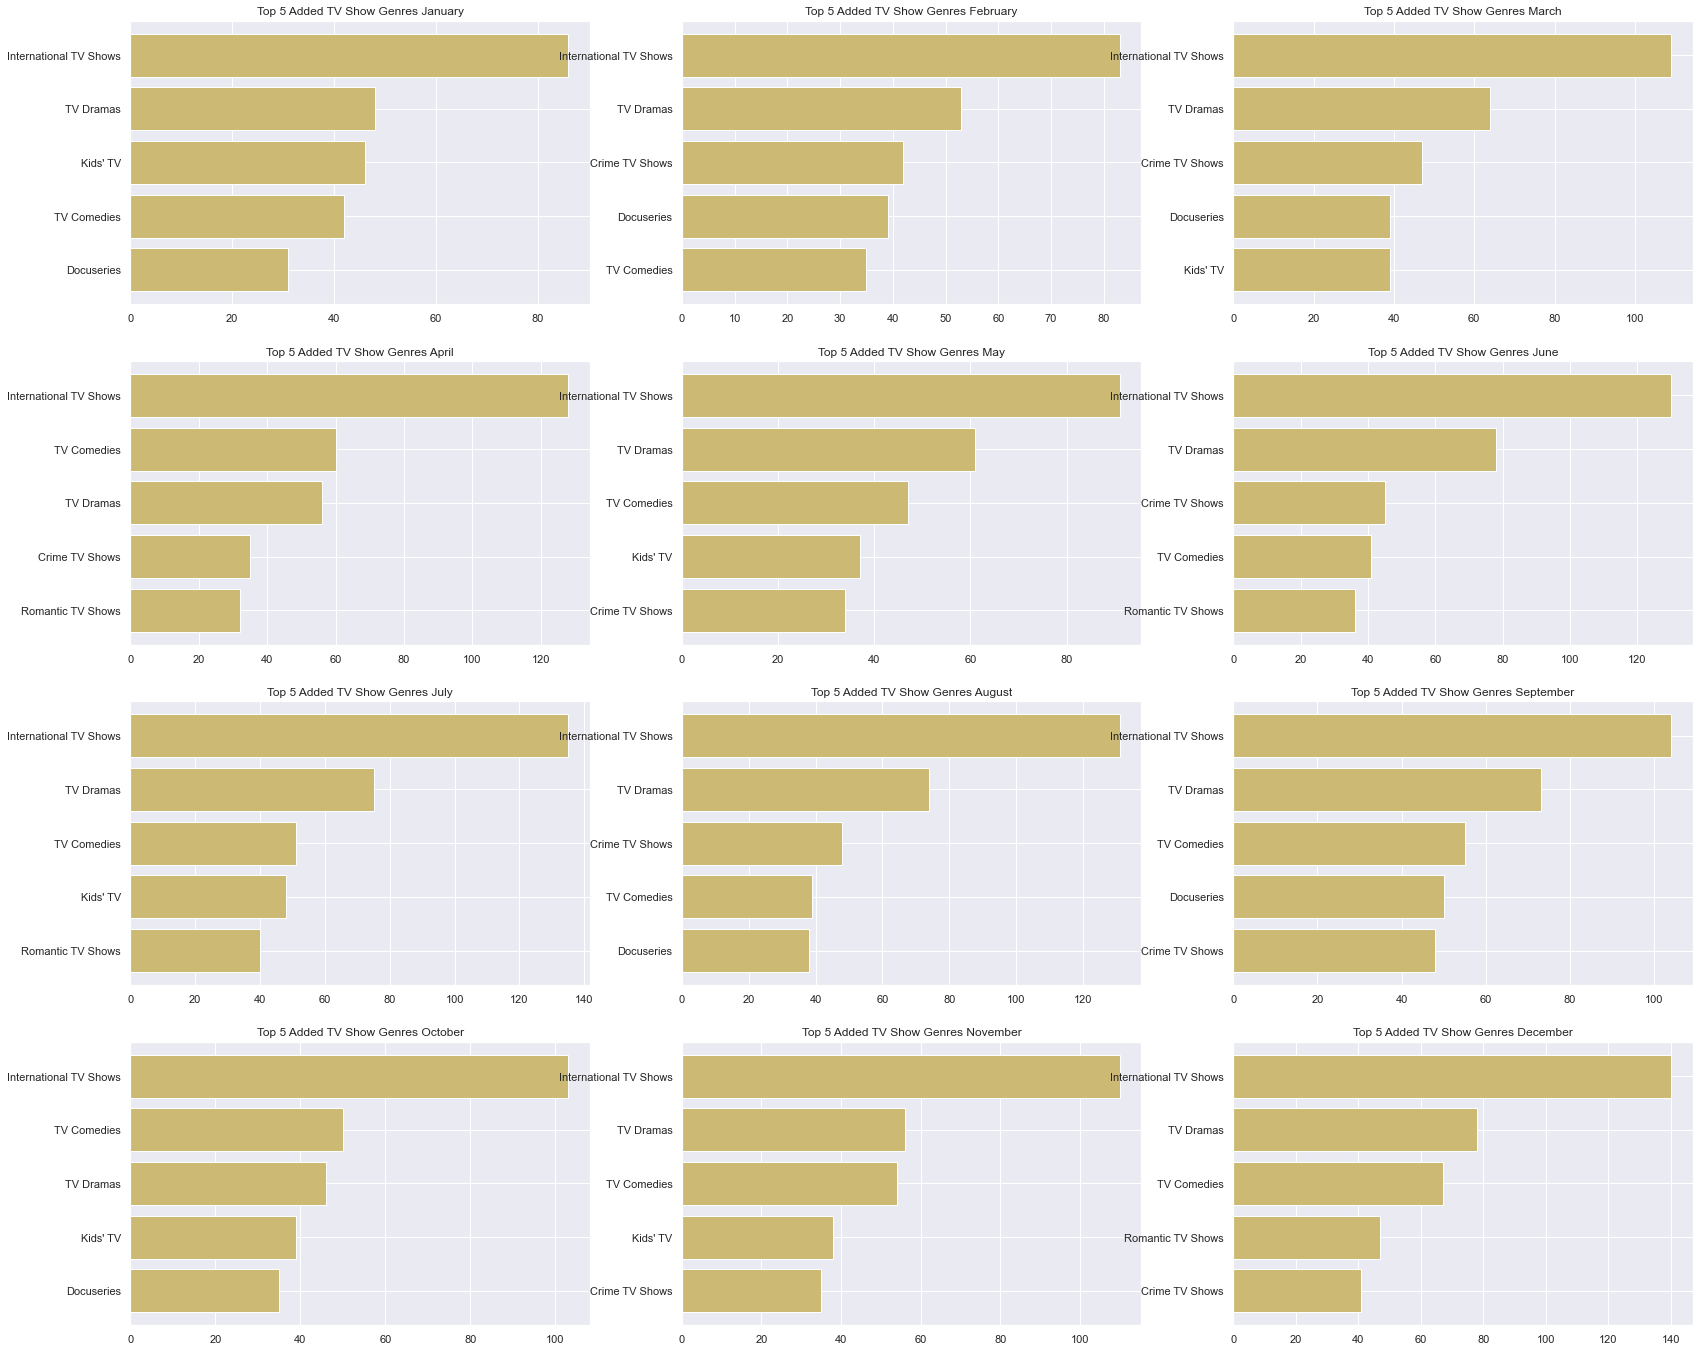

In [58]:
# added_month 기준 : TV Show
i = 0
fig, ax = plt.subplots(4, 3, figsize=(28, 24))

for month in month_order:
    example = data[(data['added_month']==month)&(data['type']=='TV Show')].iloc[:, 14:].sum()
    example = example[example > 0]
    ex = example.to_dict()
    
    sorted_month_genr = sorted(ex, key = ex.get, reverse=True)
    
    n = sorted_month_genr[:5][::-1]
    w = [ex[key] for key in n] 
    
    i += 1
    plt.subplot(4, 3, i)
    plt.barh(n, w, color='y')
    plt.title('Top 5 Added TV Show Genres {}'.format(month))
    
plt.show()

***
### 연도별, 국가별 자주 나오는 장르

In [65]:
data.country.isna().sum()

831

In [64]:
data.groupby(['country','release_year']).size().to_frame()

0
country           release_year   
, France, Algeria 2014          1
, South Korea     2021          1
Argentina         1985          2
                  1998          1
                  2004          1
...                            ..
Vietnam           2019          2
                  2020          1
                  2021          1
West Germany      1977          1
Zimbabwe          2017          1

[1754 rows x 1 columns]

In [78]:
country_name = data.groupby('country').size().sort_values(ascending=False).index.to_list()[:6]

### 나라 고정, 연도별 많이 나온 장르

In [73]:
data_us = data[data['country']=='United States']
data_us.shape

(2818, 56)

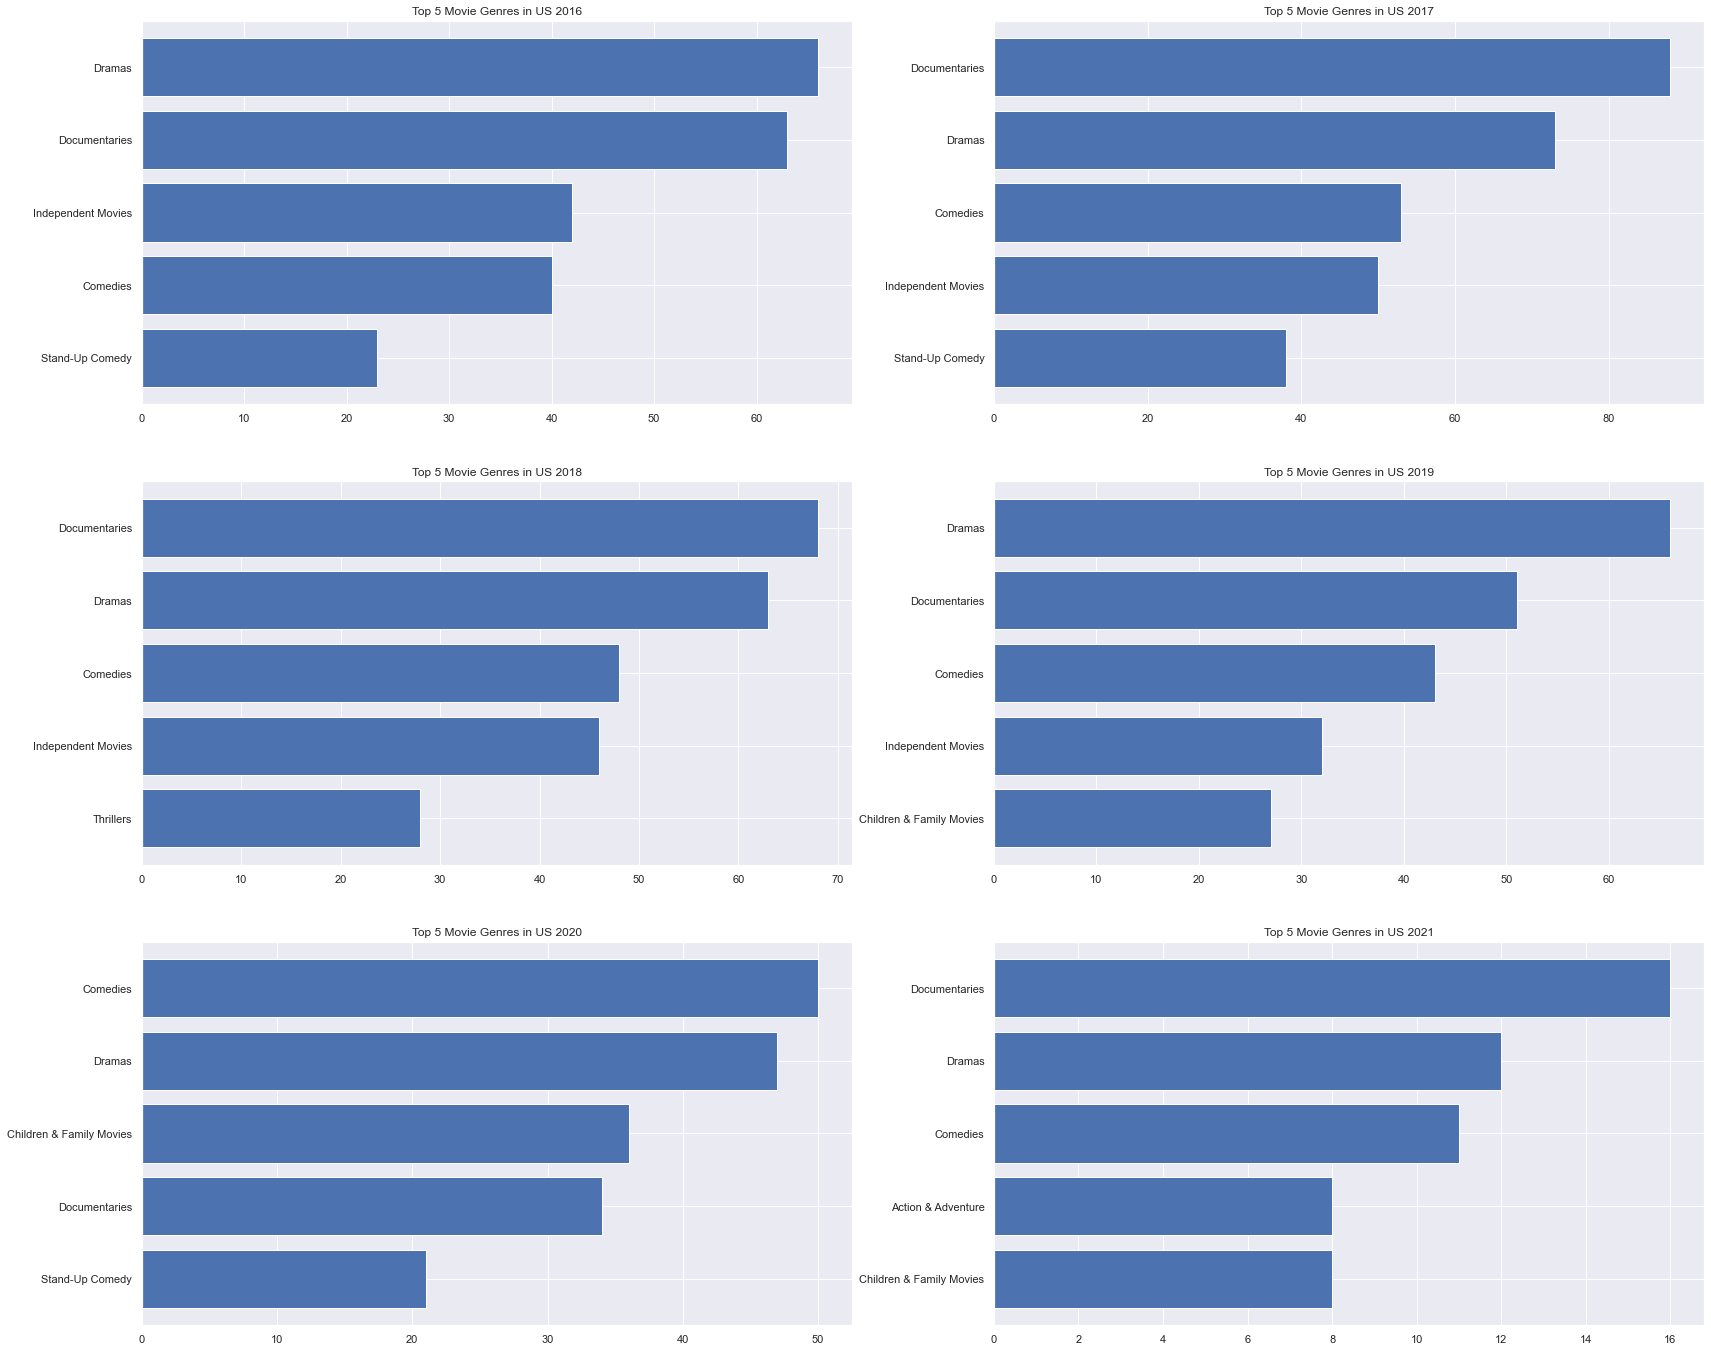

In [87]:
# release_year 기준 : Movies : US
i = 0
fig, ax = plt.subplots(3, 2, figsize=(28, 24))

for year in range(2016, 2022):
    example = data_us[(data_us['release_year']==year)&(data_us['type']=='Movie')].iloc[:, 14:].sum()
    example = example[example > 0]
    ex = example.to_dict()
    
    sorted_year_genr = sorted(ex, key = ex.get, reverse=True)
    
    n = sorted_year_genr[:5][::-1]
    w = [ex[key] for key in n] 
    
    i += 1
    plt.subplot(3, 2, i)
    plt.barh(n, w)
    plt.title('Top 5 Movie Genres in US {}'.format(year))
    
plt.show()

### 연도 고정, 나라 별 장르

In [91]:
data_year = data[data['release_year']==2020]
example = data_year[(data_year['country']=='South Korea')&(data_year['type']=='Movie')].iloc[:, 14:].sum()
example = example[example > 0]
ex = example.to_frame()
#ex

In [80]:
country_name

['United States', 'India', 'United Kingdom', 'Japan', 'South Korea', 'Canada']

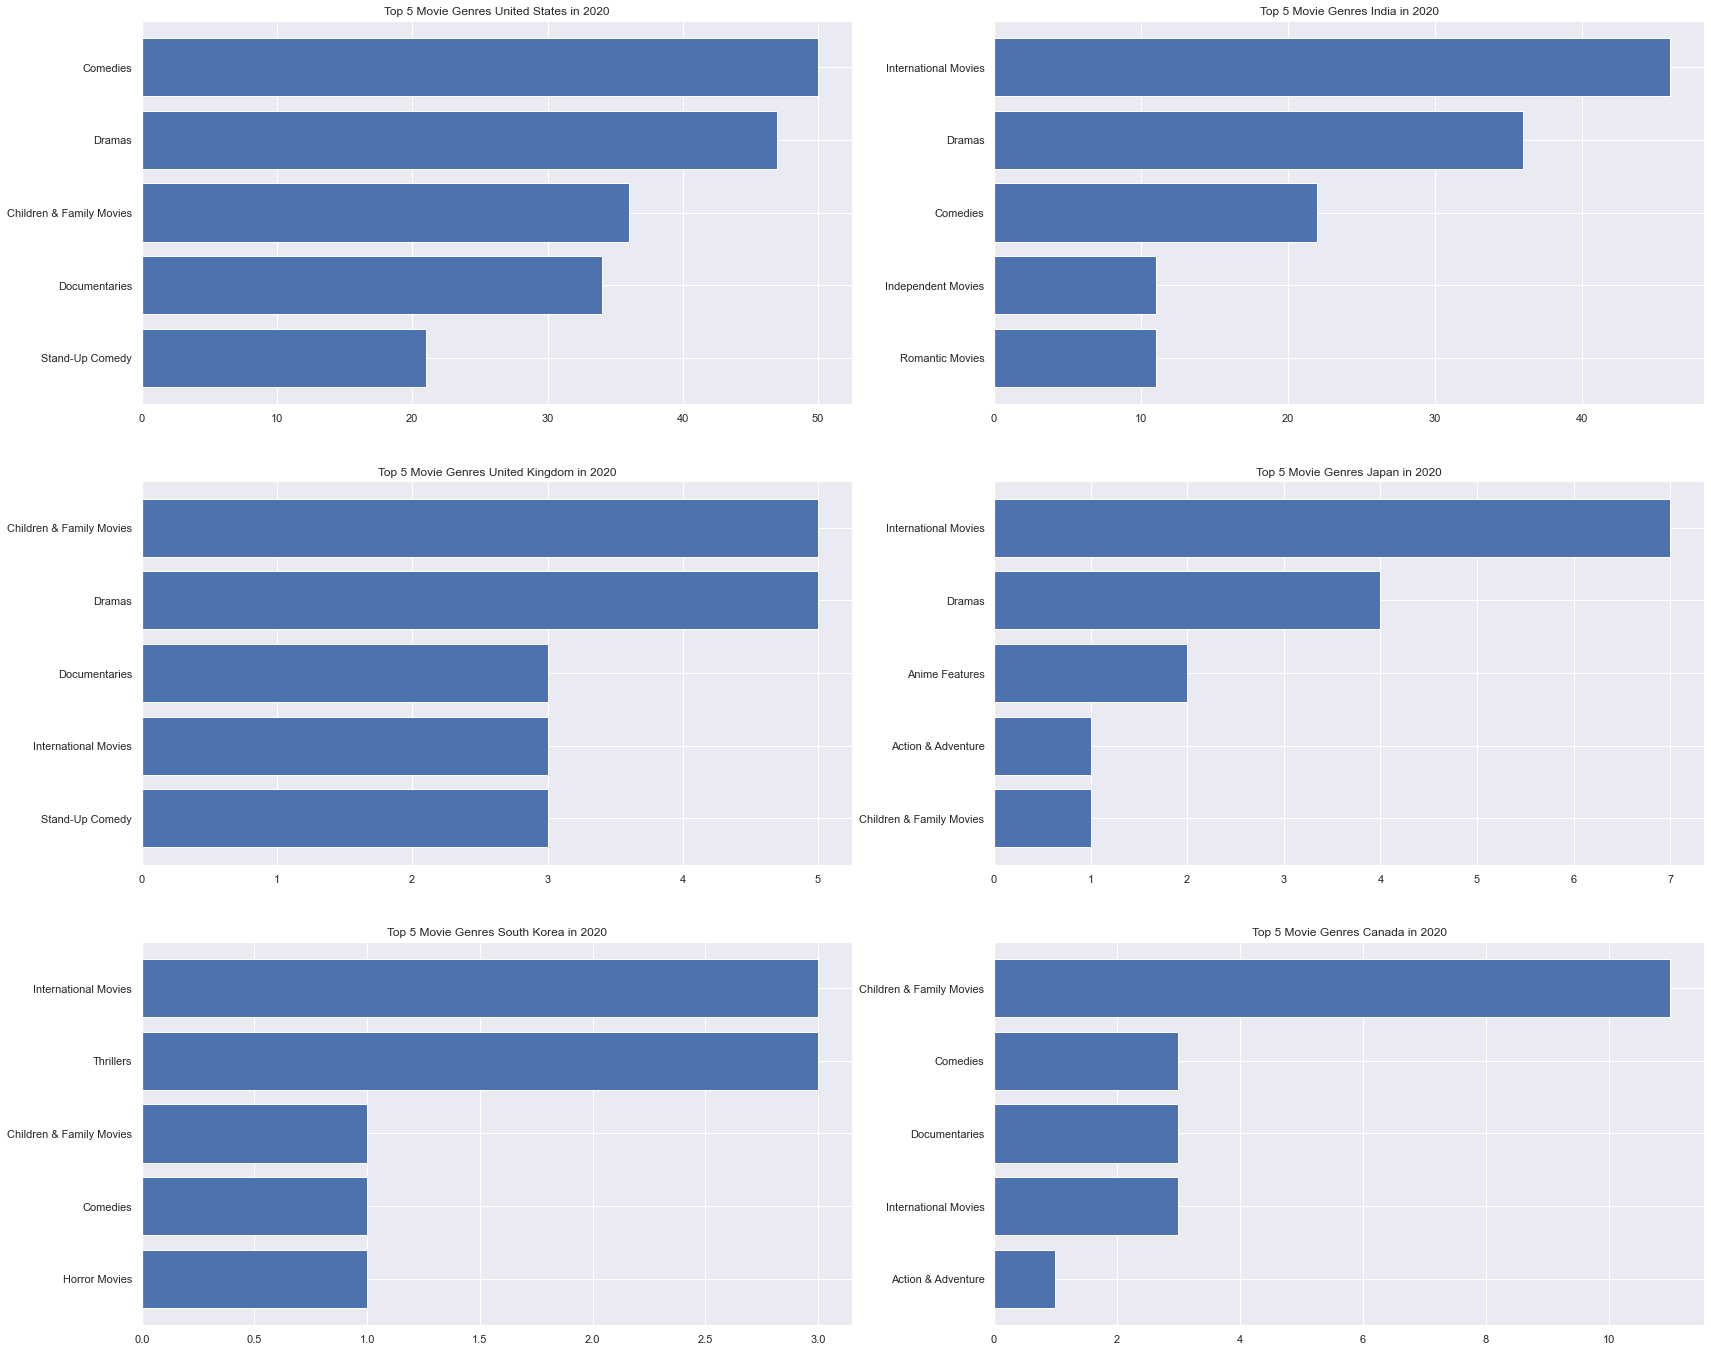

In [85]:
# release_year 기준 : Movies : 2020
data_year = data[data['release_year']==2020]

i = 0
fig, ax = plt.subplots(3, 2, figsize=(28, 24))

for country in country_name:
    example = data_year[(data_year['country']==country)&(data_year['type']=='Movie')].iloc[:, 14:].sum()
    example = example[example > 0]
    ex = example.to_dict()
    
    sorted_year_genr = sorted(ex, key = ex.get, reverse=True)
    
    n = sorted_year_genr[:5][::-1]
    w = [ex[key] for key in n] 
    
    i += 1
    plt.subplot(3, 2, i)
    plt.barh(n, w)
    plt.title('Top 5 Movie Genres {} in 2020'.format(country))
    
plt.show()

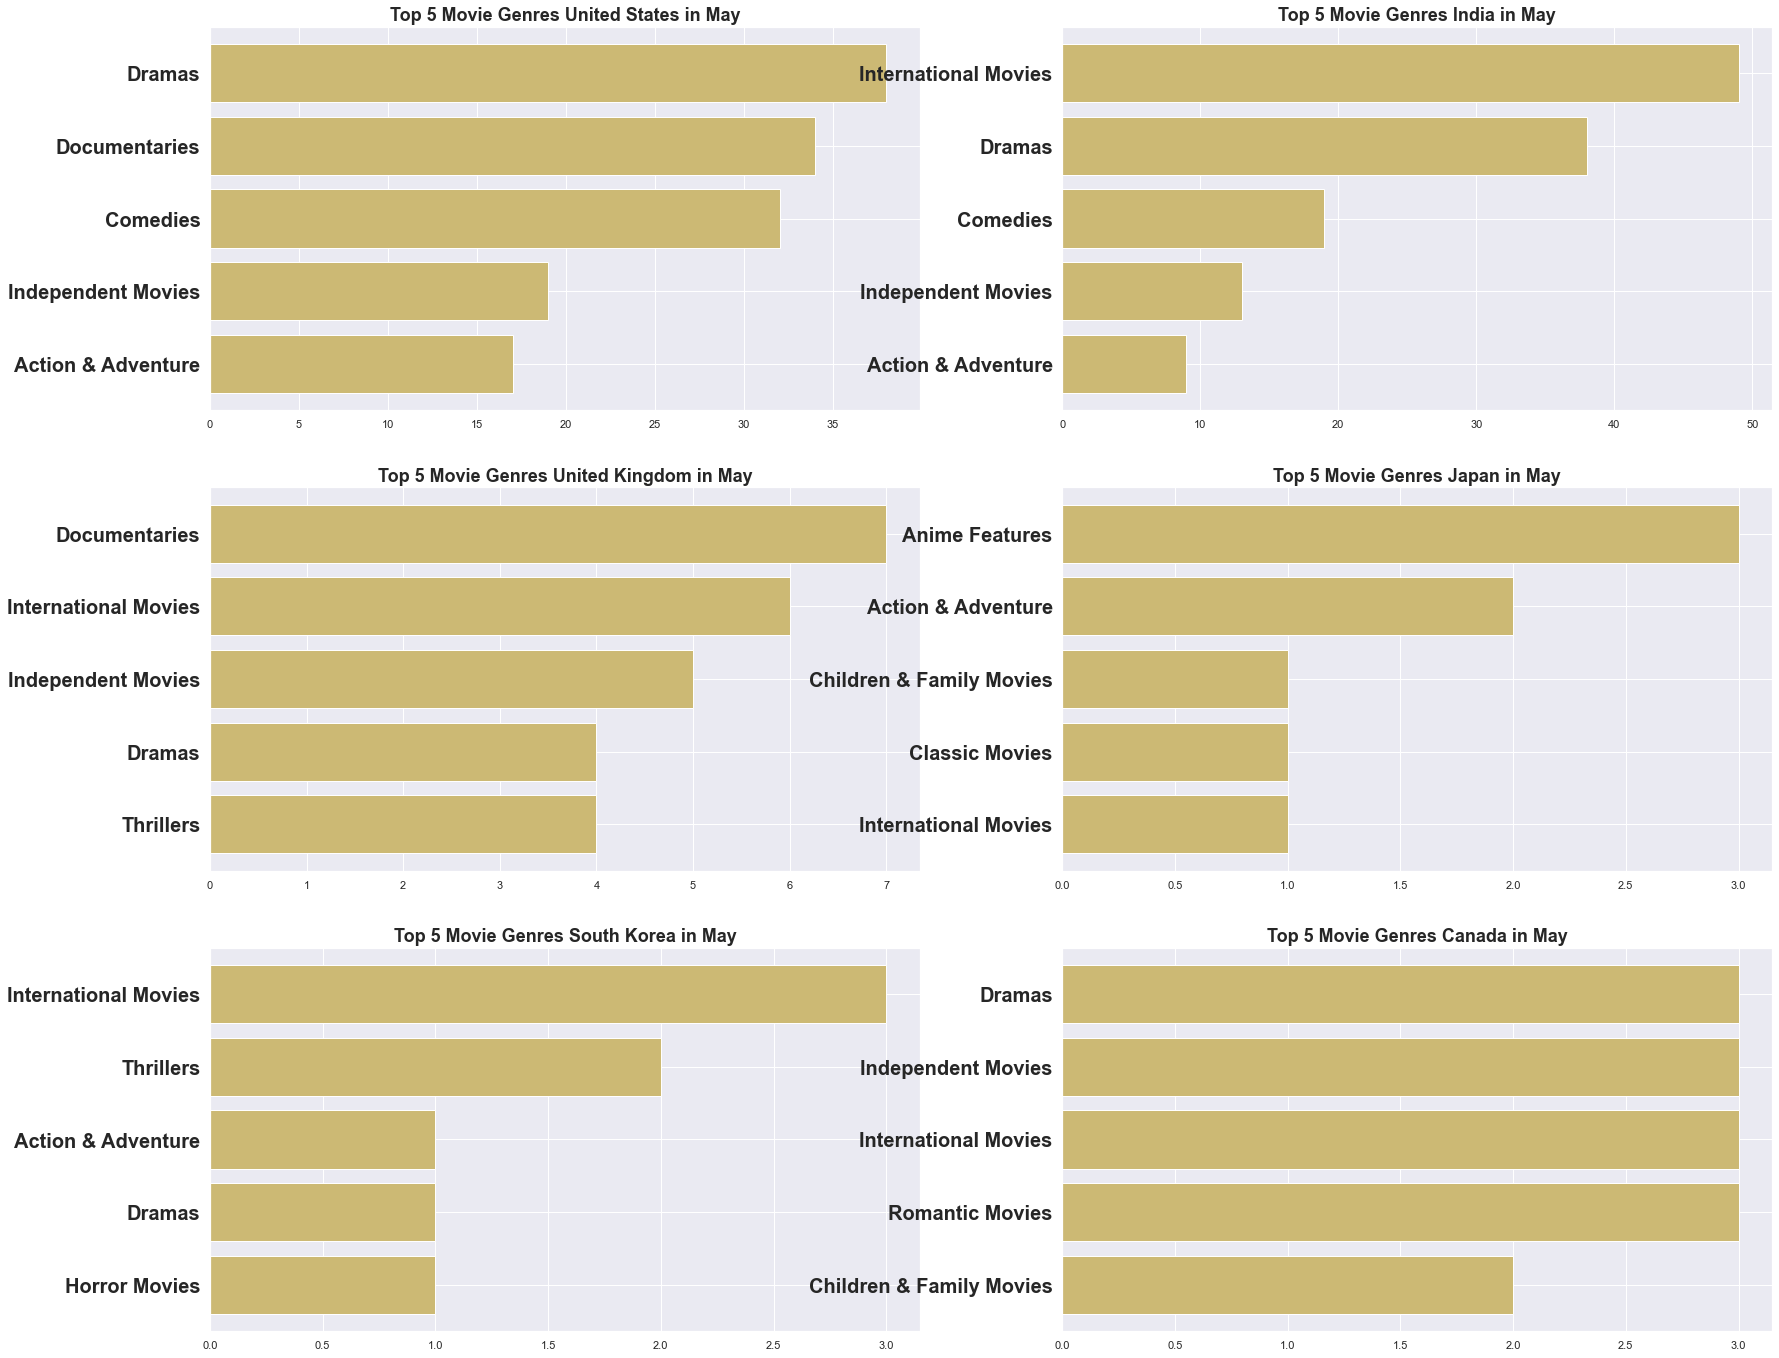

In [278]:
# 월 고정 -> release year의 month 였으면 더 의미 있었을 듯
data_month = data[data['added_month']=='May']

i = 0
fig, ax = plt.subplots(3, 2, figsize=(28, 24))

for country in country_name:
    example = data_month[(data_month['country']==country)&(data_month['type']=='Movie')].iloc[:, 14:].sum()
    example = example[example > 0]
    ex = example.to_dict()
    
    sorted_month_genr = sorted(ex, key = ex.get, reverse=True)
    
    n = sorted_month_genr[:5][::-1]
    w = [ex[key] for key in n] 
    
    i += 1
    plt.subplot(3, 2, i)
    plt.barh(n, w, color='y')
    plt.title('Top 5 Movie Genres {} in May'.format(country), fontsize = 18, fontweight='bold')
    plt.yticks(fontsize=20, fontweight='bold')
plt.show()

#### 그래프를 이렇게 그리는 게 비교가 잘 되는 지 모르겠음. 일단 글자가 한 눈에 안 들어옴  
- x축 단위 통일?
- font size 조정
***
## 나라 별 배우 확인

In [240]:
data_a = pd.read_csv('./netflix_titles.csv')

data_cast = data_a[data_a['country']=='South Korea']
data_cast.shape

(199, 12)

In [241]:
data_cast.cast.isna().sum()

3

In [242]:
data_cast.dropna(subset=['cast'], inplace=True)
data_cast.shape

(196, 12)

In [243]:
# 배우 고유값 리스트로
orig_act = [x.split(',') for x in data_cast['cast']]
act = np.unique(sum(orig_act, []))
act

array([' Adeline Chetail', ' Ae-yeon Jeong', ' Ah-in Yoo', ...,
       'Yoo Jae-suk', 'Yu Jun-sang', 'Zo In-sung'], dtype='<U24')

In [244]:
# 배우 수
len(act)

1179

In [245]:
# one hot encoding , 배우 수가 너무 많은데
data_cast['cast'] = [x.split(', ') for x in data_cast['cast']]
cast_data = MultiLabelBinarizer(classes=act).fit_transform(data_cast['cast'].values)
df_cast = pd.DataFrame(columns=act, data=cast_data, index=data_cast.index)
df_cast.head()

,Adeline Chetail,Ae-yeon Jeong,Ah-in Yoo,Ahn Bo-hyun,Ahn Eun-jin,Ahn Hyo-min,Ahn Hyo-seop,Ahn Jae-hong,Ahn Jae-hyeon,Ahn Jae-wook,...,Ye-ri Han,Yeo Jin-goo,Yeon Woo-jin,Yim Si-wan,Yo-Won Lee,Yoo Ah-in,Yoo Byung Jae,Yoo Jae-suk,Yu Jun-sang,Zo In-sung
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
# data에 one-hot encoding 추가
data_cast = pd.concat([data_cast, df_cast], axis=1)
data_cast.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Ye-ri Han,Yeo Jin-goo,Yeon Woo-jin,Yim Si-wan,Yo-Won Lee,Yoo Ah-in,Yoo Byung Jae,Yoo Jae-suk,Yu Jun-sang,Zo In-sung
104,s105,TV Show,Tayo the Little Bus,NaN,"[Robyn Slade, Kami Desilets]",South Korea,"September 6, 2021",2016,TV-Y,2 Seasons,...,0,0,0,0,0,0,0,0,0,0
289,s290,TV Show,The Crowned Clown,NaN,"[Yeo Jin-goo, Lee Se-young, Kim Sang-kyung, Ju...",South Korea,"August 10, 2021",2019,TV-14,1 Season,...,0,1,0,0,0,0,0,0,0,0
456,s457,TV Show,Her Private Life,NaN,"[Park Min-young, Kim Jae-uk, Ahn Bo-hyun, Jung...",South Korea,"July 15, 2021",2019,TV-14,1 Season,...,0,0,0,0,0,0,0,0,0,0
545,s546,TV Show,YooHoo to the Rescue,NaN,"[Kira Buckland, Ryan Bartley, Bryce Papenbrook...",South Korea,"July 6, 2021",2020,TV-Y,3 Seasons,...,0,0,0,0,0,0,0,0,0,0
556,s557,Movie,The 8th Night,Kim Tae-hyung,"[Lee Sung-min, Park Hae-joon, Kim You-jung, Na...",South Korea,"July 2, 2021",2021,TV-14,116 min,...,0,0,0,0,0,0,0,0,0,0


In [247]:
# 영화 데이터와 드라마 데이터를 movie와 tv에 할당
movie_c = data_cast[data_cast['type']=='Movie']
tv_c = data_cast[data_cast['type']=='TV Show']
#movie_c.head()

In [248]:
movie_c.iloc[:,12:].sum()

 Adeline Chetail    0
 Ae-yeon Jeong      0
 Ah-in Yoo          0
 Ahn Bo-hyun        0
 Ahn Eun-jin        0
                   ..
Yoo Ah-in           1
Yoo Byung Jae       1
Yoo Jae-suk         0
Yu Jun-sang         0
Zo In-sung          1
Length: 1179, dtype: int64

In [249]:
# 영화에 사용되는 cast 분포
movie_casts = movie_c.iloc[:,12:].sum()
movie_casts = movie_casts[movie_casts>0]
print(len(movie_casts))
movie_casts

41


4Minute            1
Baek Yoon-sik      1
Bruce Khan         1
Byung-hun Lee      1
Cha In-pyo         1
Cho Jung-seok      1
Dong-hwi Lee       1
Gang Dong-won      2
Gong Yoo           2
Goo Jin            1
Ha-neul Kang       1
Hong Bum-ki        1
Hyun Bin           1
Jang Dong-gun      1
Jang Ki-yong       1
Jung-jae Lee       1
Jung-min Hwang     1
Kang In-soo        1
Kang-ho Song       2
Kim Da-mi          1
Kim Go-eun         1
Ko Soo             1
Kyung-gu Seol      2
Lee Je-hoon        1
Lee Jung-jae       1
Lee Sun-kyun       1
Lee Sung-min       1
Min-sik Choi       1
Nam-gil Kim        2
Park Hae-il        1
Park Na-rae        1
Park Shin-hye      2
Ryu Seung-ryong    1
Song Joong-ki      1
Song Kang-ho       2
Suk-kyu Han        1
Um Tae-goo         1
Woo-sung Jung      2
Yoo Ah-in          1
Yoo Byung Jae      1
Zo In-sung         1
dtype: int64

In [250]:
# 드라마에 사용되는 장르 분포
tv_casts = tv_c.iloc[:,12:].sum()
tv_casts = tv_casts[tv_casts>0]
print(len(tv_casts))
tv_casts

146


Bae Suzy          2
Baek Yoon-sik     1
Bill Rogers       1
Bul-am Choi       1
Cho Byeong-kyu    1
                 ..
Yoo Ah-in         1
Yoo Byung Jae     1
Yoo Jae-suk       1
Yu Jun-sang       2
Zo In-sung        1
Length: 146, dtype: int64

In [260]:
movie_casts.max()
tv_casts.max()
tv_casts[tv_casts==3]
movie_casts[movie_casts==2]

Gang Dong-won    2
Gong Yoo         2
Kang-ho Song     2
Kyung-gu Seol    2
Nam-gil Kim      2
Park Shin-hye    2
Song Kang-ho     2
Woo-sung Jung    2
dtype: int64

In [257]:
data_cast.iloc[:, 12:].sum().max()

5

#### 배우는 많이 나와봐야 5번이라서 의미가 있을까 싶음

In [266]:
a1 = data[data['type']=='Movie']['Dramas'].sum()
a2 = data[data['type']=='Movie']['Comedies'].sum()
a3 = data[data['type']=='Movie']['International Movies'].sum()

In [270]:
year = ['2018', '2019', '2020', '2021'] # 바꿔야함
year = data[(data['type']=='Movie') & (data['released_year']==y)]

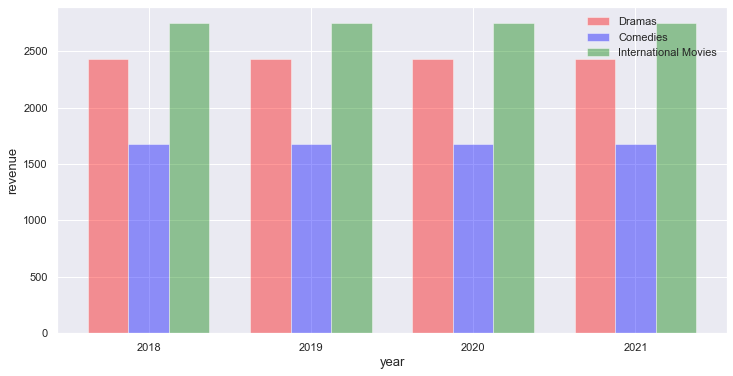

In [269]:


# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(4)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, a1, bar_width, alpha=0.4, color='red', label='Dramas')

b2 = plt.bar(index + bar_width, a2, bar_width, alpha=0.4, color='blue', label='Comedies')

b3 = plt.bar(index + 2 * bar_width, a3, bar_width, alpha=0.4, color='green', label='International Movies')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 4 + bar_width, 1), year)

# x축, y축 이름 및 범례 설정
plt.xlabel('year', size = 13)
plt.ylabel('revenue', size = 13)
plt.legend()
plt.show()